In [1]:
from qiskit import *
%matplotlib inline

In [2]:
first=str(input("enter first number in binary format "))
second=str(input("enter second number in binary fromat "))

enter first number in binary format 1011
enter second number in binary fromat 1000


In [3]:
l=len(first)
l2=len(second)
if len(first)>len(second):
    n=len(first)
else:
    n=len(second)

In [4]:
a=QuantumRegister(n)
b=QuantumRegister(n+1)
c=QuantumRegister(n)
c1=ClassicalRegister(n+1)
circuit=QuantumCircuit(a,b,c,c1)

In [5]:
for i in range(l):
    if first[i] == "1":
        circuit.x(a[l - (i+1)])
for i in range(l2):
    if second[i] == "1":
        circuit.x(b[l2 - (i+1)])

In [6]:
for i in range(n-1):
    circuit.ccx(a[i], b[i], c[i+1])
    circuit.cx(a[i], b[i])
    circuit.ccx(c[i], b[i], c[i+1])

In [7]:
circuit.ccx(a[n-1], b[n-1], b[n])
circuit.cx(a[n-1], b[n-1])
circuit.ccx(c[n-1], b[n-1], b[n])

In [8]:
circuit.cx(c[n-1], b[n-1])

In [9]:
for i in range(n-1):
    circuit.ccx(c[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    circuit.cx(a[(n-2)-i], b[(n-2)-i])
    circuit.ccx(a[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    circuit.cx(c[(n-2)-i], b[(n-2)-i])
    circuit.cx(a[(n-2)-i], b[(n-2)-i])

In [10]:
for i in range(n+1):
    circuit.measure(b[i], c1[i])

In [11]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1).result()

In [12]:
print(int(list(result.get_counts().keys())[0], 2))

19


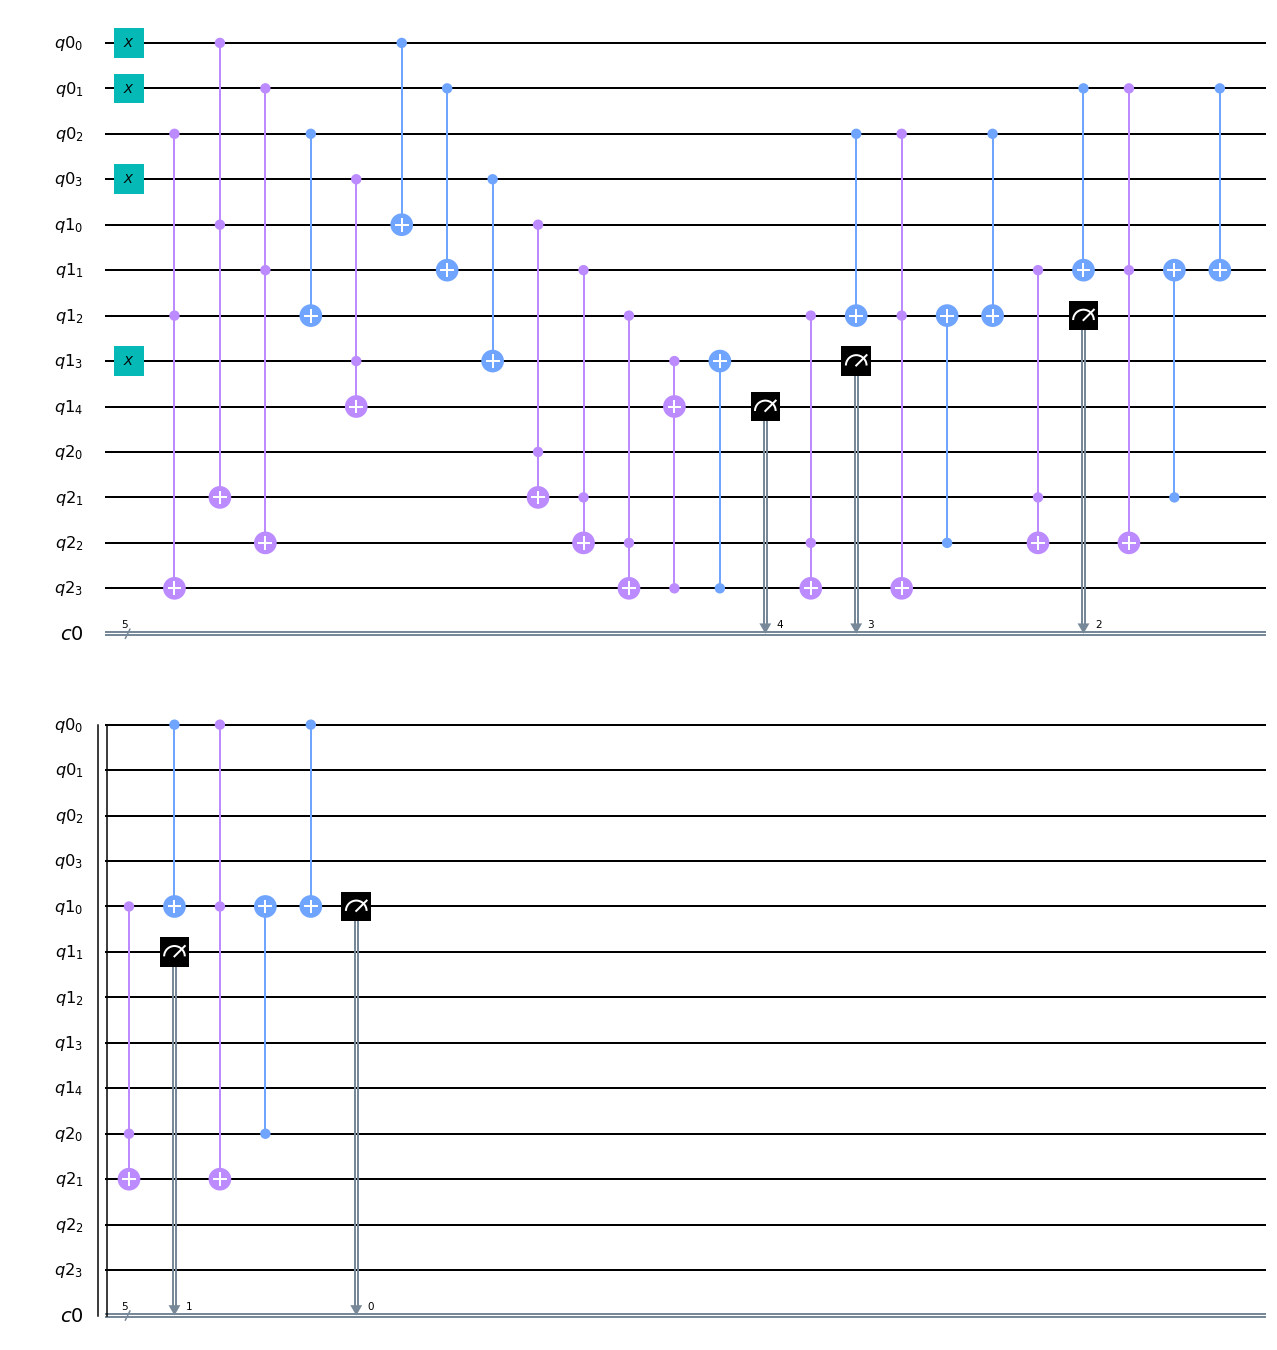

In [13]:
circuit.draw(output="mpl")